#Lấy Dataset từ Kaggle

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'gtsrb-german-traffic-sign:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F82373%2F191501%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240510%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240510T130856Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8d47abc76b7c529d645704b2359f572833e39689069203650bf0b149ceb2bad08391e6f12db92fc086be69ced0723b4ebd8084af7eb70fb27354e8c61f02ba2908a2227e1466f2e0542a388e2bbd22a34f6f5144543e2d1a8e116e7691f62cc8f444e9a8916ca2e05d2ae3f7be3b6fefba2170dfde7d44092bb9bef24f3f8311070b51525a01f1d2916ff06e427e835d680eba9cf947f863d729216615903ceae2eb105563c3ad8d770f95fd58c111a4aefae2051462f14c879078427992c8c3df312cdd0a1014c89d40dcaa14ef094ea89bf9b8f66cfa9ed8a065bd5f0d0053cbe0ff7a8dfea090ff330b744370781331172bc905f54a4637e8f3f1591b447c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 641568792 bytes downloaded
Downloaded and uncompressed: gtsrb-german-traffic-sign
Data source import complete.


#Import thư viện

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
import random
import tensorflow as tf
from PIL import Image
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [ ]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'

#Import ảnh

In [ ]:
count = 0
images = []
classNo = []
myList = os.listdir(train_path)
print("Tổng số Classes: ", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(train_path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(train_path + "/" + str(count) + "/" + y)
        curImg = cv2.resize(curImg, (30,30))
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Tổng số Classes:  43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


# Label Overview

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

#Xem tổng quan Dataset

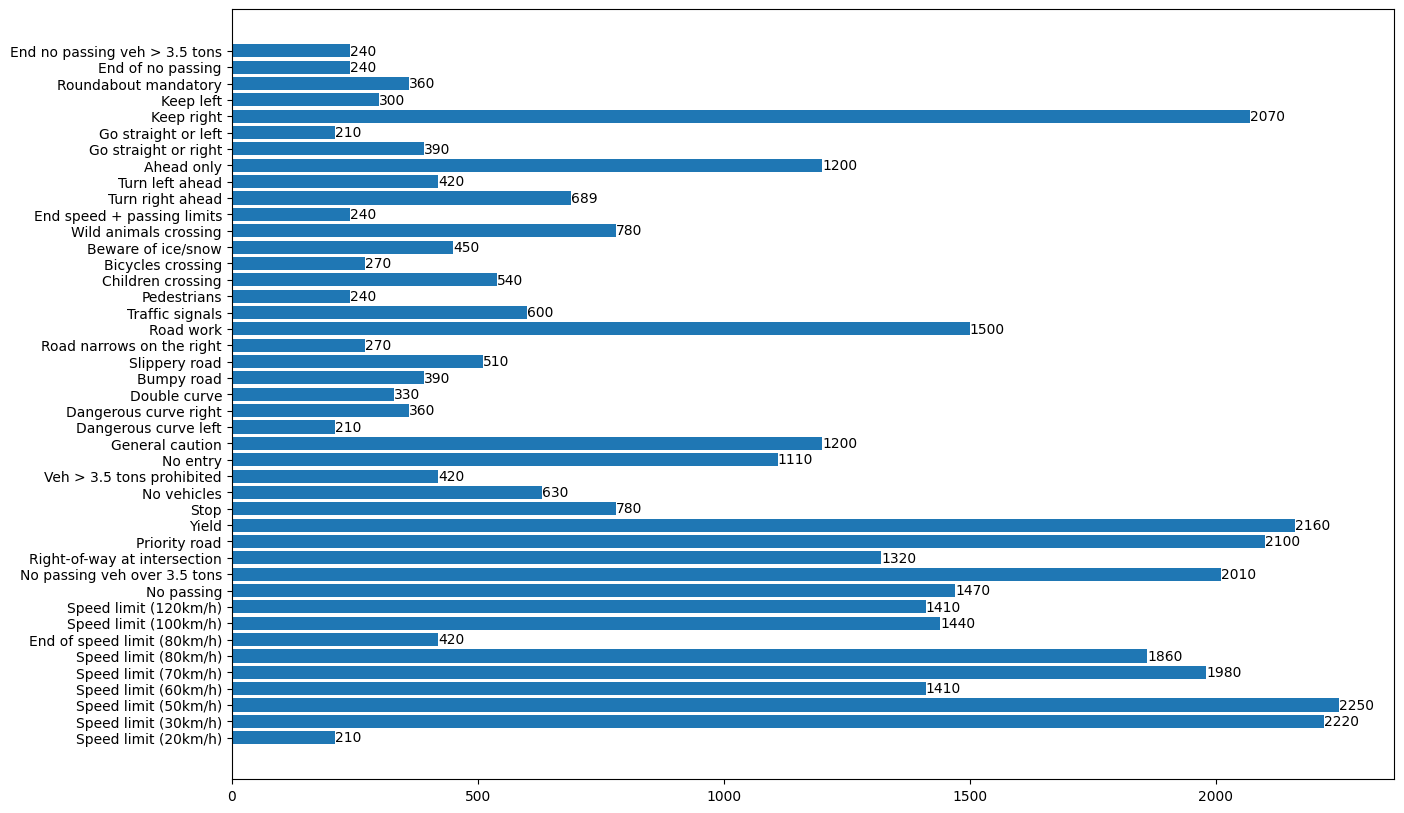

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sort class_num based on the keys of the classes dictionary
class_num_sorted = sorted(class_num, key=lambda x: list(classes.values()).index(x))
train_number_sorted = [train_number[class_num.index(c)] for c in class_num_sorted]

# Plotting the number of images in each class
plt.figure(figsize=(15,10))
bars = plt.barh(class_num_sorted, train_number_sorted)

# Adding values at the beginning of each bar
for bar, value in zip(bars, train_number_sorted):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, value, va='center', ha='left')

plt.show()

# Hiển thị 25 hình ảnh ngẫu nhiên từ tập Test

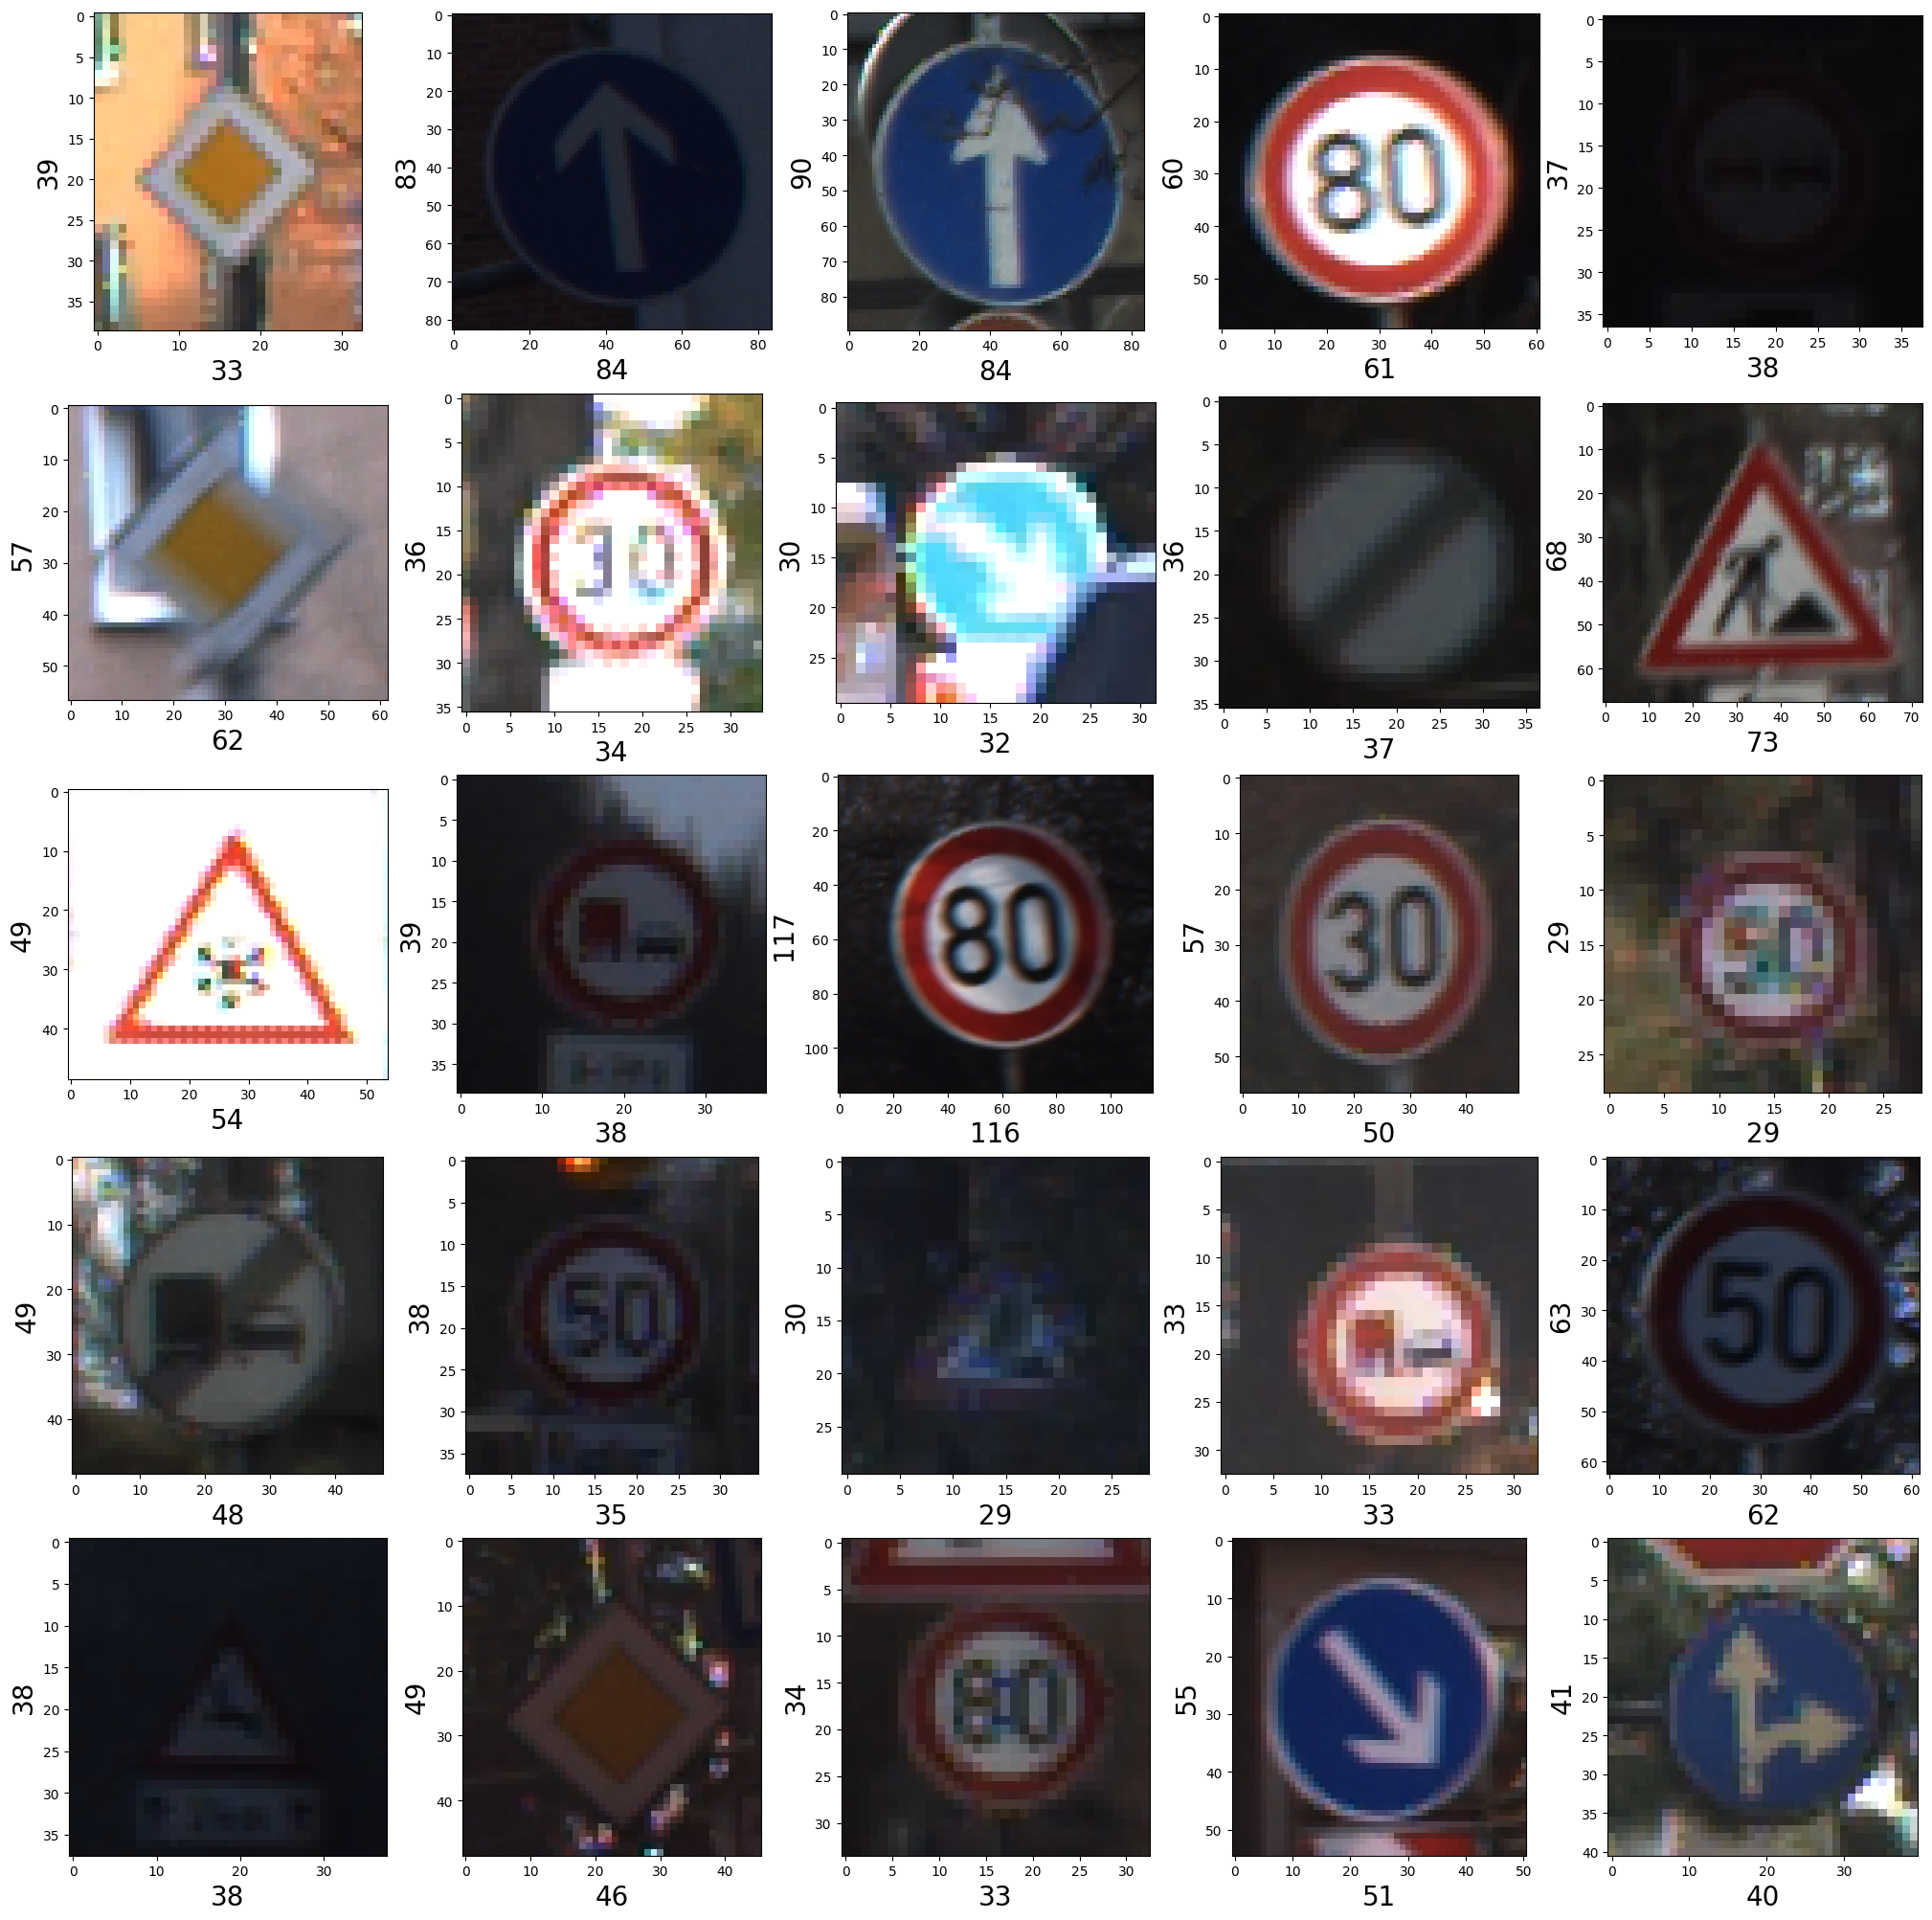

In [ ]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(False)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

# Split Data
####X_train = ARRAY OF IMAGES TO TRAIN,
####y_train = CORRESPONDING CLASS ID

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(images, classNo, test_size= 0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_validation = X_validation/255

print("X_train.shape", X_train.shape)
print("X_validation.shape", X_validation.shape)
print("y_train.shape", y_train.shape)
print("y_validation.shape", y_validation.shape)

X_train.shape (27446, 30, 30, 3)
X_validation.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_validation.shape (11763,)


#Kiểm tra số lượng ảnh có bằng với số LABLES cho mỗi dataset

In [ ]:
print("Data Shapes")
print("Train", end="");
print(X_train.shape, y_train.shape)
print("Validation", end="");
print(X_validation.shape, y_validation.shape)
assert (X_train.shape[0] == y_train.shape[0]), " TRAINING SET: Số lượng ảnh khác số lượng lables!"
assert (X_validation.shape[0] == y_validation.shape[0]), " VALIDATION SET: Số lượng ảnh khác số lượng lables!"
assert (X_train.shape[1:] == (30,30,3)), " Kích thước ảnh Training SAI! "
assert (X_validation.shape[1:] == (30,30,3)), " Kích thước ảnh Validation SAI! "

Data Shapes
Train(27446, 30, 30, 3) (27446,)
Validation(11763, 30, 30, 3) (11763,)


# Đọc file CSV

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labels.csv') # File chứa tên và ID các classes
print("data shape ", data.shape, type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


# Biểu diễn ngẫu nhiên một số ảnh mẫu

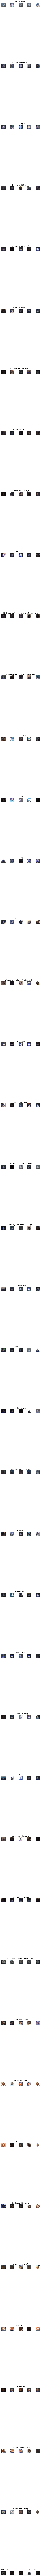

In [ ]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            num_of_samples.append(len(x_selected))

# PLOT biểu đồ cột về số lượng Samples cho mỗi loại

[157, 1516, 1564, 995, 1360, 1298, 319, 1032, 946, 1033, 1454, 969, 1446, 1513, 538, 446, 285, 777, 842, 143, 260, 225, 266, 349, 188, 1055, 422, 167, 384, 181, 312, 535, 181, 479, 287, 856, 262, 137, 1451, 219, 256, 168, 173]


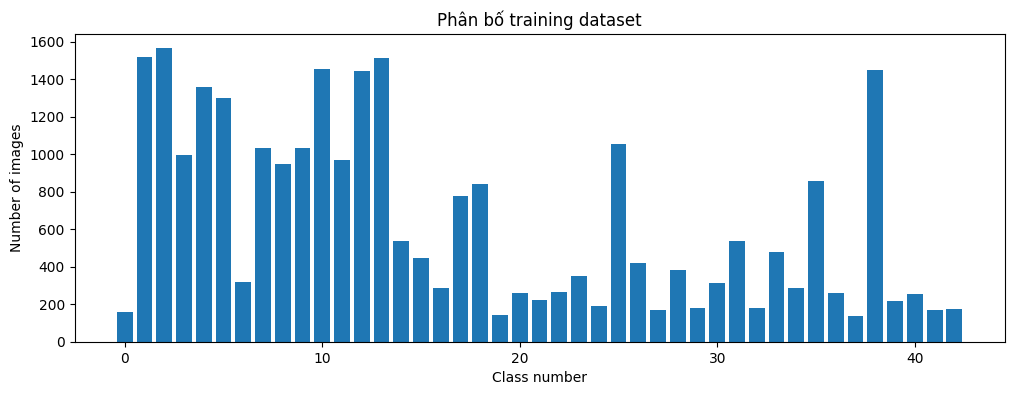

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Phân bố training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

# Chuyển thành one-hot

In [ ]:
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)

print(y_train.shape)
print(y_validation.shape)

(27446, 43)
(11763, 43)


#Augmenting the data (Tăng cường dữ liệu)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

# CNN Model

In [ ]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),

    Dense(43, activation='softmax')
])

In [ ]:
epochs = 30

model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#TRAIN MODEL

In [ ]:
print(model.summary())
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_validation, y_validation))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

# Lưu model vào file .h5 để sử dụng cho real-time  

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# PLOT

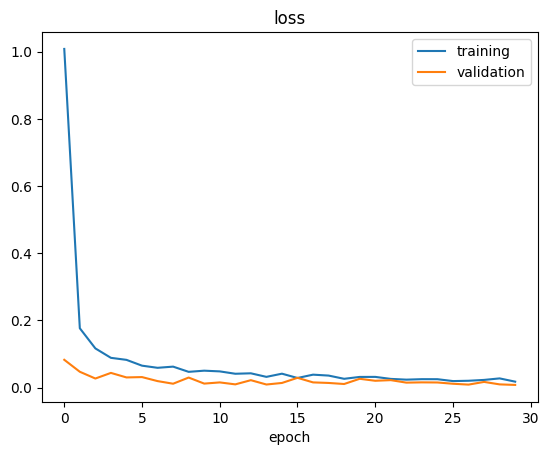

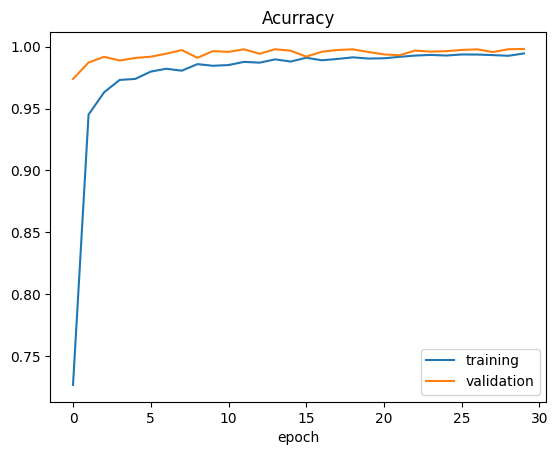

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

#Evaluating the model

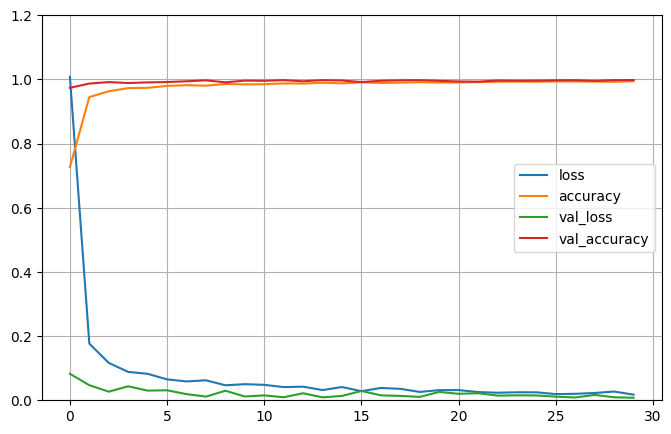

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.show()

#Loading the test data and running the predictions

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 9s 22ms/step
Test Data accuracy:  97.96516231195565


#Visualizing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<Axes: >

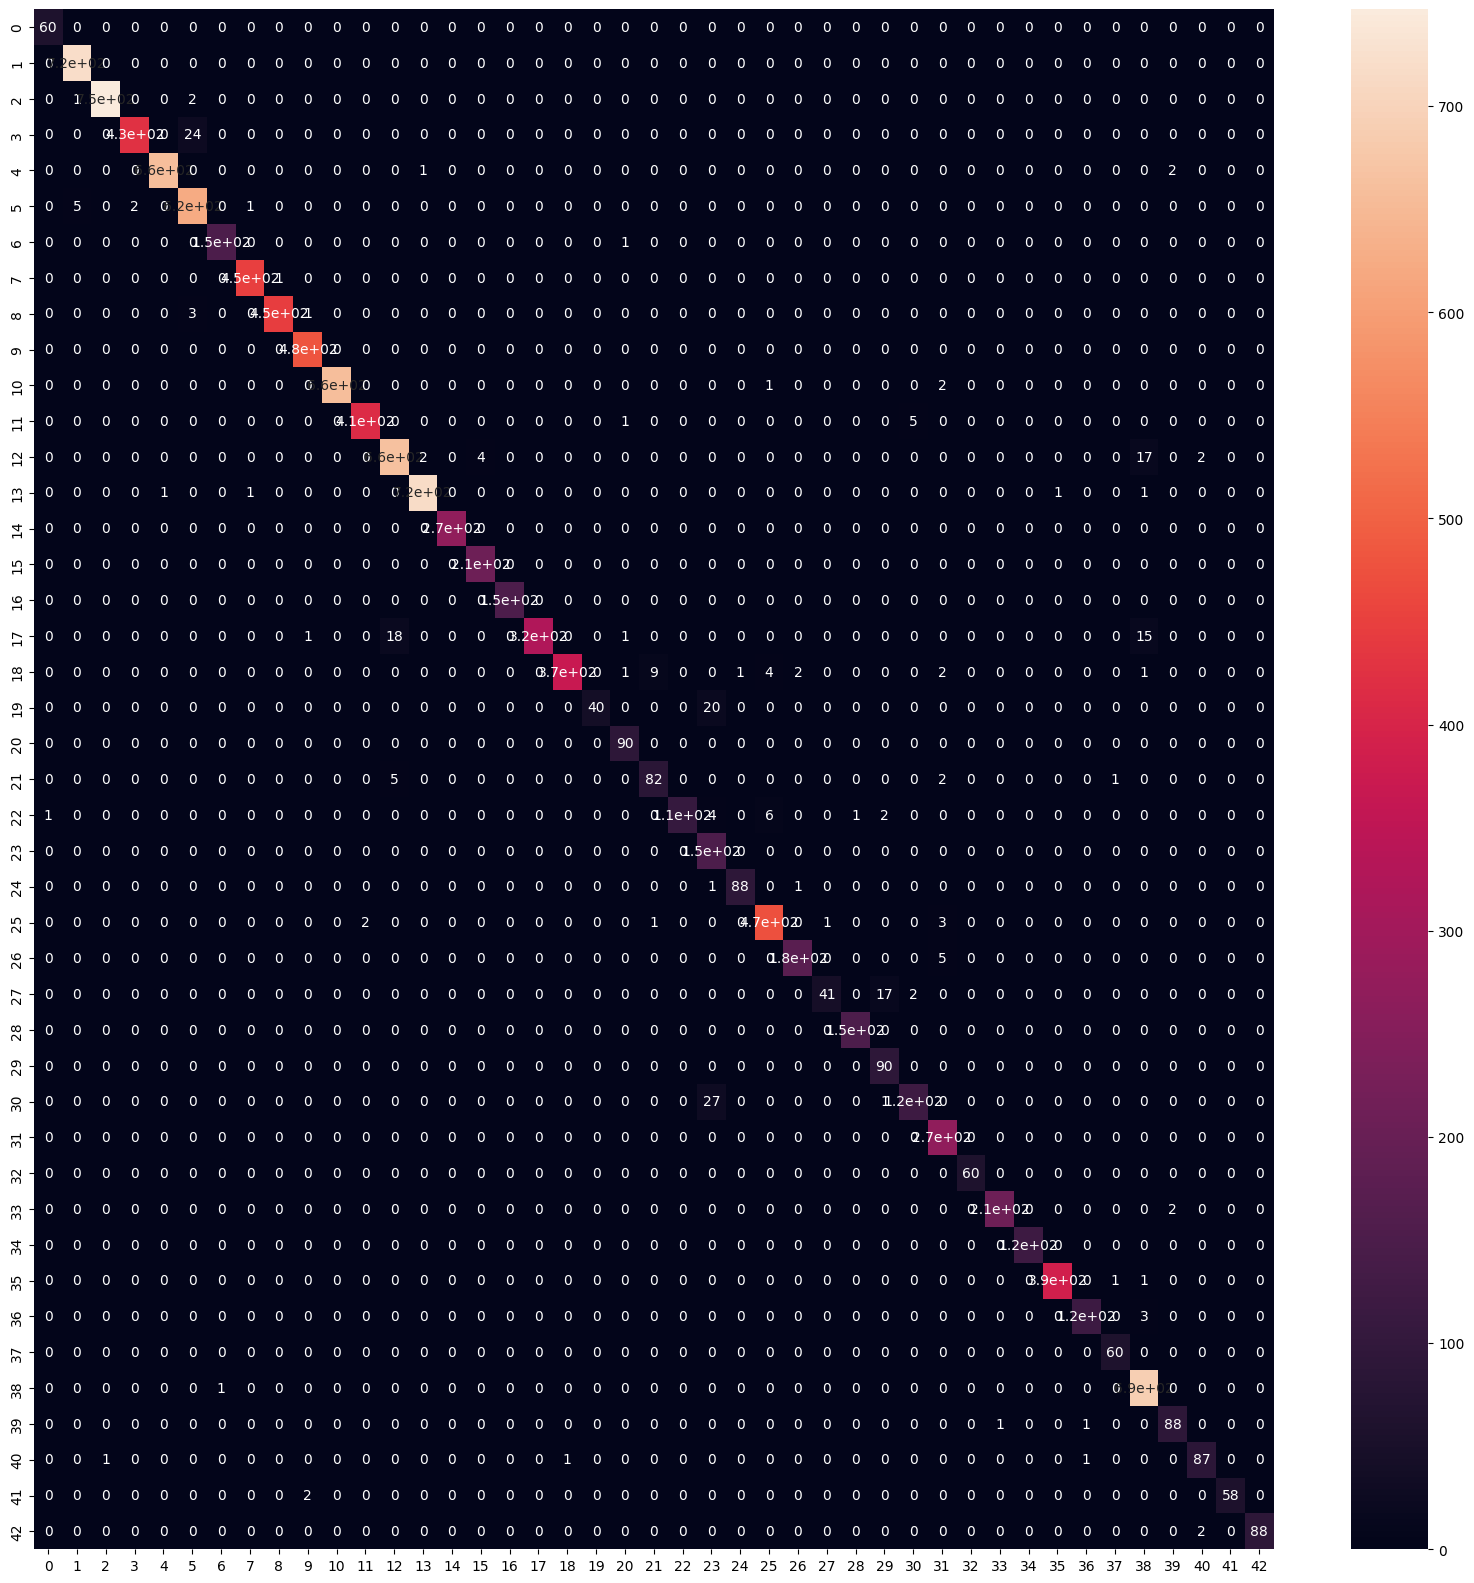

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

#Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      1.00      1.00       720
           2       1.00      1.00      1.00       750
           3       1.00      0.95      0.97       450
           4       1.00      1.00      1.00       660
           5       0.96      0.99      0.97       630
           6       0.99      0.99      0.99       150
           7       1.00      1.00      1.00       450
           8       1.00      0.99      0.99       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       1.00      0.99      0.99       420
          12       0.97      0.96      0.97       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

#Predictions on Test Data

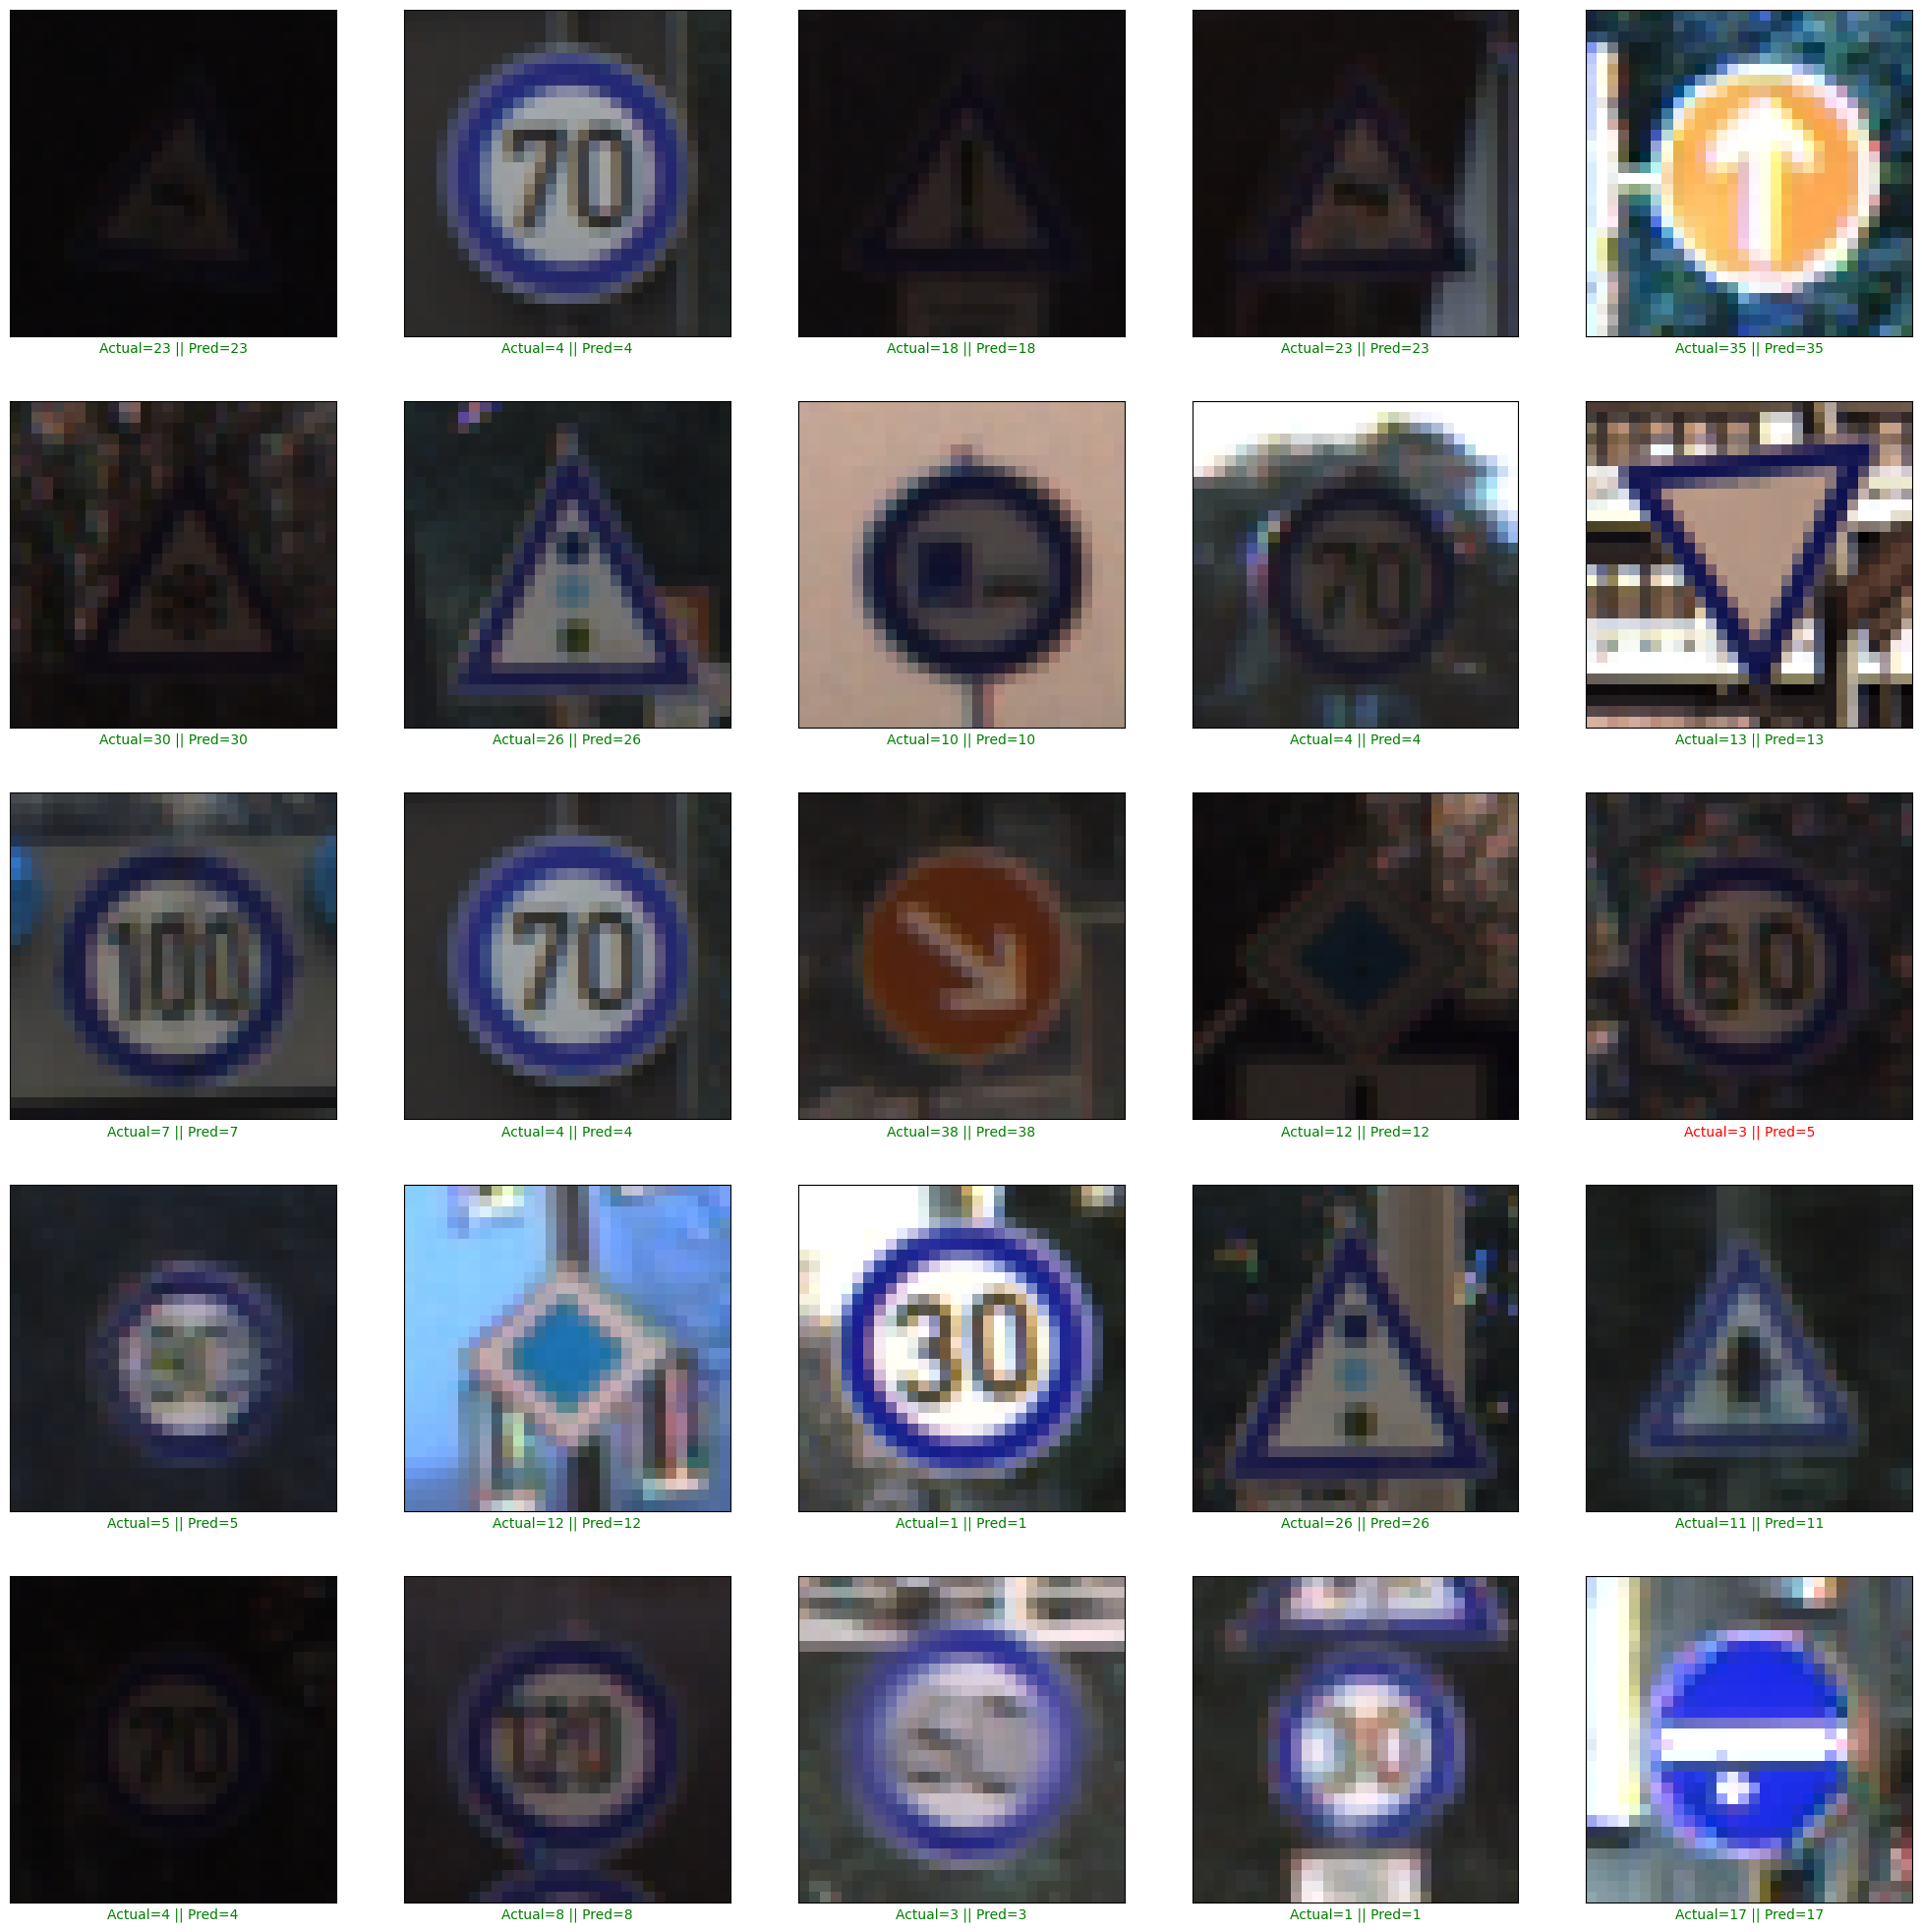

In [ ]:
plt.figure(figsize=(25, 25))

random_indexes = random.sample(range(len(X_test)), 25)

for i, index in enumerate(random_indexes):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[index]
    actual = labels[index]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color=col)
    plt.imshow(X_test[index])

plt.show()
